In [12]:
import pandas as pd

file_path = "sales_data.csv"
sales_df = pd.read_csv(file_path)

print(sales_df.info())
print(sales_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order ID       100000 non-null  object 
 1   Order Date     100000 non-null  object 
 2   Region         100000 non-null  object 
 3   Customer       100000 non-null  object 
 4   Product        100000 non-null  object 
 5   Quantity Sold  100000 non-null  int64  
 6   Unit Price     100000 non-null  float64
 7   Discount       100000 non-null  float64
 8   Total Sales    100000 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.9+ MB
None
    Order ID  Order Date         Region      Customer   Product  \
0  ORD000001  2022-05-10  South America  Customer_454     Mouse   
1  ORD000002  2022-12-31         Africa  Customer_367    Tablet   
2  ORD000003  2022-11-10         Europe  Customer_224     Mouse   
3  ORD000004  2020-05-01  South America  Customer_356  Keyboa

In [13]:
print(sales_df.isnull().sum())

Order ID         0
Order Date       0
Region           0
Customer         0
Product          0
Quantity Sold    0
Unit Price       0
Discount         0
Total Sales      0
dtype: int64


In [14]:
print(sales_df.describe())

       Quantity Sold     Unit Price       Discount    Total Sales
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        4.995680    1024.405232       0.150314    4350.368520
std         2.573085     562.648405       0.086542    3545.723237
min         1.000000      50.060000       0.000000      35.940000
25%         3.000000     538.547500       0.080000    1437.812500
50%         5.000000    1025.550000       0.150000    3358.545000
75%         7.000000    1511.180000       0.230000    6473.985000
max         9.000000    1999.970000       0.300000   17882.550000


In [15]:
print("Duplicates:", sales_df.duplicated().sum())

Duplicates: 0


In [16]:
sales_df = sales_df.drop_duplicates()

In [17]:
region_sales = sales_df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False)

In [18]:
print(region_sales)

Region
Europe           74236920.71
Australia        72672996.17
Africa           72384080.41
Asia             72180746.62
South America    72044500.06
North America    71517608.06
Name: Total Sales, dtype: float64


In [19]:
top_products = sales_df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False).head(5)

In [20]:
print(top_products)

Product
Tablet        63031707.98
Laptop        62456892.78
Keyboard      62241290.56
Smartphone    62121163.57
Headphones    61762935.36
Name: Total Sales, dtype: float64


In [21]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"])

sales_df["Year"] = sales_df["Order Date"].dt.year
sales_df["Month"] = sales_df["Order Date"].dt.month
sales_df["Day"] = sales_df["Order Date"].dt.day

sales_df["Month Name"] = sales_df["Order Date"].dt.strftime("%B")
sales_df["Weekday"] = sales_df["Order Date"].dt.strftime("%A")

print(sales_df.head())

    Order ID Order Date         Region      Customer   Product  Quantity Sold  \
0  ORD000001 2022-05-10  South America  Customer_454     Mouse              3   
1  ORD000002 2022-12-31         Africa  Customer_367    Tablet              3   
2  ORD000003 2022-11-10         Europe  Customer_224     Mouse              5   
3  ORD000004 2020-05-01  South America  Customer_356  Keyboard              1   
4  ORD000005 2021-04-11         Africa  Customer_484    Laptop              2   

   Unit Price  Discount  Total Sales  Year  Month  Day Month Name   Weekday  
0     1114.01      0.08      3074.67  2022      5   10        May   Tuesday  
1     1359.37      0.13      3547.96  2022     12   31   December  Saturday  
2     1219.09      0.14      5242.09  2022     11   10   November  Thursday  
3     1398.72      0.02      1370.75  2020      5    1        May    Friday  
4      508.38      0.19       823.58  2021      4   11      April    Sunday  


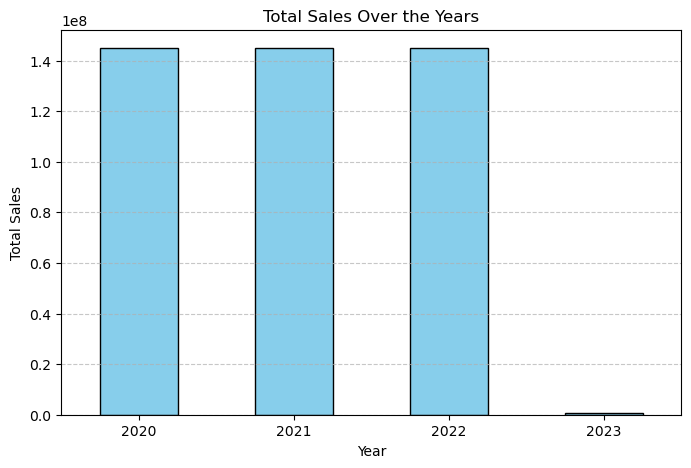

In [22]:
import matplotlib.pyplot as plt

yearly_sales = sales_df.groupby("Year")["Total Sales"].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--",alpha=0.7)

plt.show()

In [35]:
import os
print(os.getcwd())

C:\Users\sudchan
